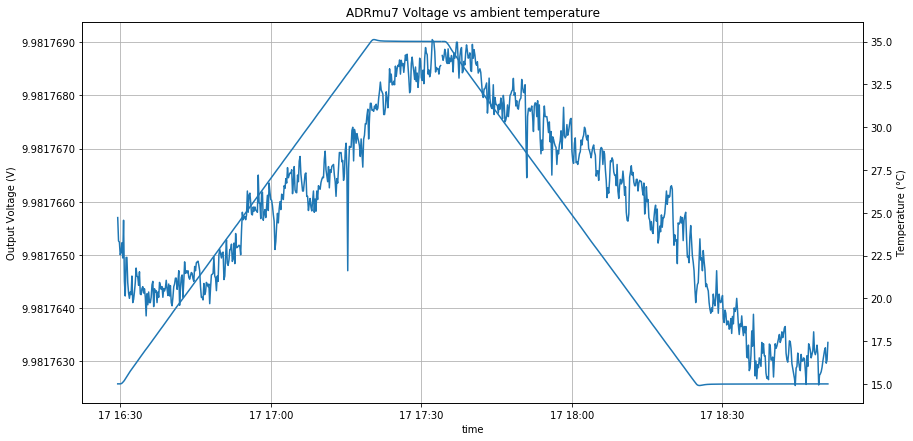

,Arroyo TECSource Chamber Temp,3458Bz
Time,,
2023-01-17 16:29:30,15.00000,9.981766
2023-01-17 16:29:40,15.00020,9.981765
2023-01-17 16:29:50,15.00040,9.981765
2023-01-17 16:30:00,15.00025,9.981765
2023-01-17 16:30:10,15.00880,9.981765
...,...,...
2023-01-17 18:50:20,14.99780,9.981763
2023-01-17 18:50:30,14.99700,9.981763
2023-01-17 18:50:40,14.99700,9.981763


In [33]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

# Fetch data
columns = ["Time", "Arroyo TECSource Chamber Temp", "3458Bz"]
raw=pd.read_csv("https://raw.githubusercontent.com/marcoreps/multiinstrumentalist/master/csv/20230117-162935_ADRmu7_15_35_TC_sweep.csv", usecols=columns)

# Use datetime as index
raw["Time"] = pd.to_datetime(raw["Time"])
raw = raw.set_index(pd.DatetimeIndex(raw["Time"]))
raw = raw.drop('Time', axis=1)

raw=raw.resample('10s').mean()
plt.rcParams["figure.figsize"] = [14, 7]
fig, ax = plt.subplots()
twin1 = ax.twinx()
twin1.set_ylabel("Temperature (°C)")
ax.grid()
ax.set(xlabel='time', ylabel='Output Voltage (V)', title='ADRmu7 Voltage vs ambient temperature')
ax.plot(raw.iloc[:,1])
twin1.plot(raw.iloc[:,0])
ax.yaxis.set_major_formatter(FormatStrFormatter('%.7f'))
plt.show()
raw
